### Análise de Mercado SNC-Lavalin

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import DataReader as wb
from quandl import get as qdl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('bmh')

,SNC-LAVALIN,BANCO_CENTRAL_CANADA,BOVESPA,VALE,BITCOIN,OURO,DOLAR,MINERIO_DE_FERRO
count,624.000000,613.000000,594.000000,594.000000,553.000000,606.000000,552.000000,608.000000
mean,37.156020,51.829964,91709.750500,48.007599,7605.327970,1393.915512,3.995650,79.730526
std,13.944904,4.436131,12450.686675,4.838847,2435.571387,159.574973,0.550979,12.109340
min,15.461376,33.382996,63570.000000,34.099998,3242.484375,1176.199951,3.145100,61.600000
25%,23.989263,51.107323,81552.750000,44.729615,6321.200684,1282.125000,3.728475,68.387500
50%,33.998505,52.887802,91029.000000,48.536970,7624.920898,1326.500000,3.879650,80.165000
75%,52.314431,54.762005,101109.000000,51.229998,9281.508789,1502.199951,4.147475,87.545000
max,59.518909,56.965736,119528.000000,60.594360,17429.498047,1790.300049,5.886400,112.080000


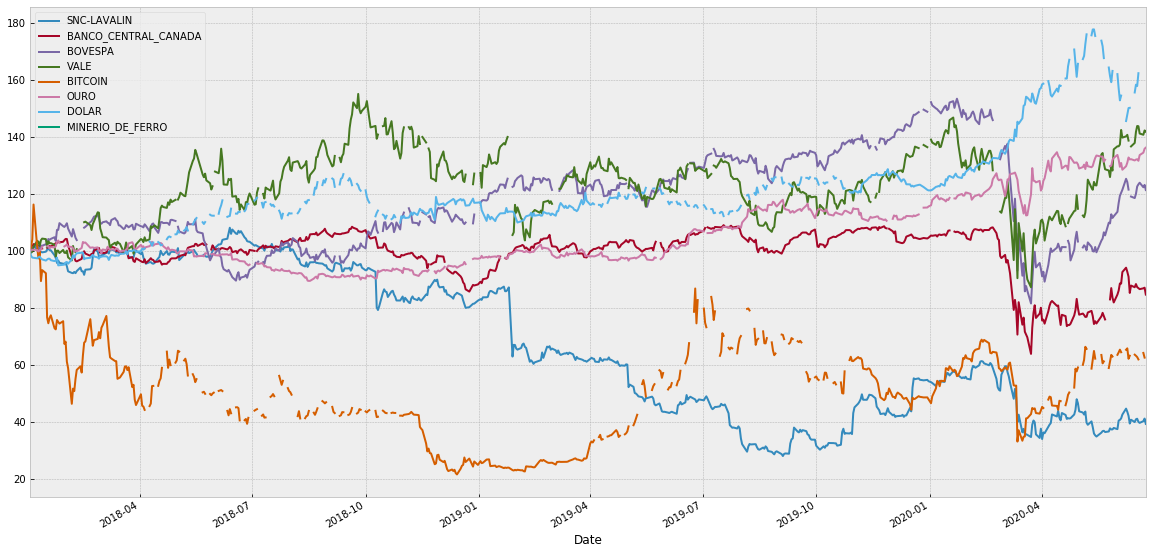

In [2]:
t_names = ['SNC-LAVALIN', 'BANCO_CENTRAL_CANADA', 'BOVESPA', 'VALE', 'BITCOIN', 'OURO', 'DOLAR', 'MINERIO_DE_FERRO']
tickers = ['SNC.TO', 'TD', '^BVSP', 'VALE3.SA', 'BTCUSD=X', 'GC=F', 'USDBRL=X']
df = pd.DataFrame()
for t in tickers:
    try:
        df[t] = wb(t, data_source='yahoo', start='2018-01-01')['Adj Close']
    except:
        pass

df['IronOre'] = qdl('CHRIS/CME_TIO3-Iron-Ore-62-Fe-CFR-China-TSI-Futures-Continuous-Contract-3-TIO3')['Settle']


df.set_axis(t_names, axis='columns', inplace=True)

(df / df.iloc[0] * 100).plot(figsize=(20,10))
df.describe()

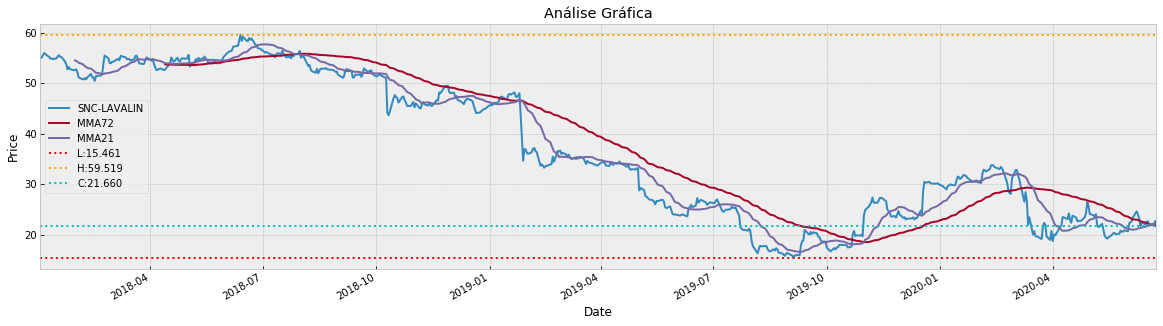

In [3]:
df[t_names[0]].plot(figsize=(20,5))
df[t_names[0]].rolling(72).mean().plot(label='MMA72')
df[t_names[0]].rolling(21).mean().plot(label='MMA21')

plt.axhline(df[t_names[0]].min(), color='r', linestyle=':', label=f'L:{df[t_names[0]].min():0.3f}')
plt.axhline(df[t_names[0]].max(), color='orange', linestyle=':', label=f'H:{df[t_names[0]].max():0.3f}')
plt.axhline(df[t_names[0]].iloc[-1], color='c', linestyle=':', label=f'C:{df[t_names[0]].iloc[-1]:0.3f}')

plt.title('Análise Gráfica')

plt.ylabel('Price')

plt.legend()

plt.show()

In [4]:
df.tail(7)

,SNC-LAVALIN,BANCO_CENTRAL_CANADA,BOVESPA,VALE,BITCOIN,OURO,DOLAR,MINERIO_DE_FERRO
Date,,,,,,,,
2020-06-16,22.549999,46.169998,93531.000000,55.389999,9480.253906,1735.400024,5.2436,99.30
2020-06-17,22.660000,45.610001,95547.000000,56.200001,9411.844727,1736.900024,5.2279,97.98
2020-06-18,22.040001,45.419998,96125.000000,56.169998,9288.017578,1729.800049,5.3772,97.15
2020-06-19,21.860001,45.240002,96572.000000,55.169998,NaN,1756.199951,NaN,97.49
2020-06-22,22.190001,45.389999,95336.000000,55.000000,9629.662109,1767.300049,5.2519,97.15
2020-06-23,22.690001,45.509998,95975.000000,55.590000,9383.277344,1785.400024,NaN,96.60
2020-06-24,21.660000,44.240002,94570.796875,55.419998,NaN,1790.300049,5.3251,NaN


In [5]:
log_returns = np.log(df / df.shift(1))

std_returns = log_returns.std()

var_returns = log_returns.var() * 250 ** 0.5

cov_returns = log_returns.cov() * 250

cor_returns = log_returns.corr()

In [6]:
log_returns.tail()

,SNC-LAVALIN,BANCO_CENTRAL_CANADA,BOVESPA,VALE,BITCOIN,OURO,DOLAR,MINERIO_DE_FERRO
Date,,,,,,,,
2020-06-18,-0.027742,-0.004175,0.006031,-0.000534,-0.013244,-0.004096,0.028158,-0.008507
2020-06-19,-0.008201,-0.003971,0.004639,-0.017963,NaN,0.015147,NaN,0.003494
2020-06-22,0.014983,0.003310,-0.012881,-0.003086,NaN,0.006301,NaN,-0.003494
2020-06-23,0.022283,0.002640,0.006680,0.010670,-0.025919,0.010190,NaN,-0.005677
2020-06-24,-0.046457,-0.028303,-0.014739,-0.003063,NaN,0.002741,NaN,NaN


In [7]:
std_returns * 100

SNC-LAVALIN             3.324525
BANCO_CENTRAL_CANADA    1.820952
BOVESPA                 2.065627
VALE                    2.695164
BITCOIN                 4.926447
OURO                    0.974178
DOLAR                   1.051657
MINERIO_DE_FERRO        1.953529
dtype: float64

In [8]:
var_returns * 100

SNC-LAVALIN             1.747548
BANCO_CENTRAL_CANADA    0.524285
BOVESPA                 0.674643
VALE                    1.148525
BITCOIN                 3.837405
OURO                    0.150054
DOLAR                   0.174871
MINERIO_DE_FERRO        0.603406
dtype: float64

In [9]:
cov_returns

,SNC-LAVALIN,BANCO_CENTRAL_CANADA,BOVESPA,VALE,BITCOIN,OURO,DOLAR,MINERIO_DE_FERRO
SNC-LAVALIN,0.276312,0.073687,0.072878,0.075628,0.079711,-0.001333,-0.014713,0.013260
BANCO_CENTRAL_CANADA,0.073687,0.082897,0.071991,0.080691,0.061034,-0.001467,-0.007829,0.015571
BOVESPA,0.072878,0.071991,0.106670,0.096466,0.080225,-0.001188,-0.010072,0.011919
VALE,0.075628,0.080691,0.096466,0.181598,0.083412,-0.000096,-0.004666,0.037533
BITCOIN,0.079711,0.061034,0.080225,0.083412,0.606747,0.007830,-0.006905,0.006478
OURO,-0.001333,-0.001467,-0.001188,-0.000096,0.007830,0.023726,0.000267,-0.004161
DOLAR,-0.014713,-0.007829,-0.010072,-0.004666,-0.006905,0.000267,0.027650,-0.000971
MINERIO_DE_FERRO,0.013260,0.015571,0.011919,0.037533,0.006478,-0.004161,-0.000971,0.095407


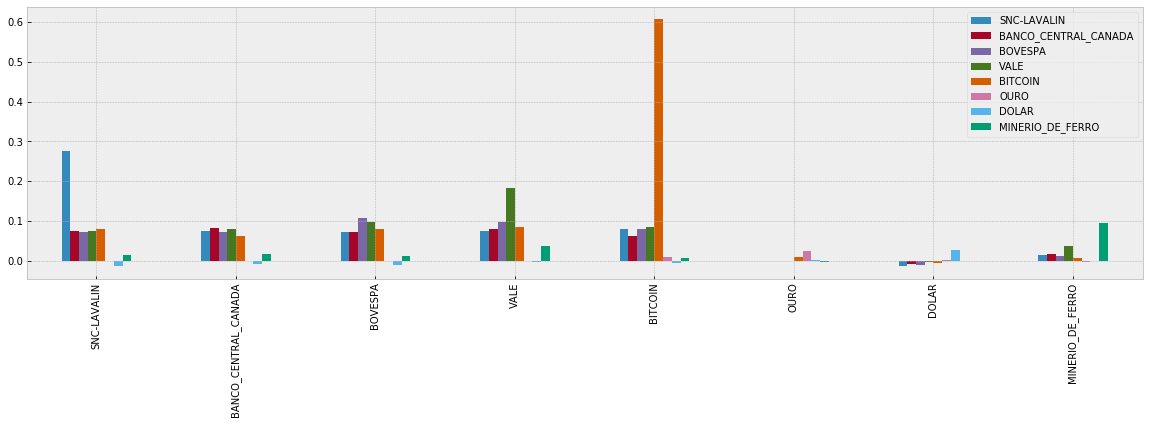

In [10]:
cov_returns[t_names].plot(kind='bar', figsize=(20,5))

In [11]:
cor_returns

,SNC-LAVALIN,BANCO_CENTRAL_CANADA,BOVESPA,VALE,BITCOIN,OURO,DOLAR,MINERIO_DE_FERRO
SNC-LAVALIN,1.000000,0.480288,0.459850,0.365737,0.181538,-0.016125,-0.156733,0.080277
BANCO_CENTRAL_CANADA,0.480288,1.000000,0.753677,0.648902,0.253562,-0.032890,-0.150437,0.174491
BOVESPA,0.459850,0.753677,1.000000,0.693100,0.295896,-0.023033,-0.173171,0.116375
VALE,0.365737,0.648902,0.693100,1.000000,0.237142,-0.001428,-0.061844,0.281986
BITCOIN,0.181538,0.253562,0.295896,0.237142,1.000000,0.064168,-0.053233,0.027258
OURO,-0.016125,-0.032890,-0.023033,-0.001428,0.064168,1.000000,0.010077,-0.087183
DOLAR,-0.156733,-0.150437,-0.173171,-0.061844,-0.053233,0.010077,1.000000,-0.019100
MINERIO_DE_FERRO,0.080277,0.174491,0.116375,0.281986,0.027258,-0.087183,-0.019100,1.000000


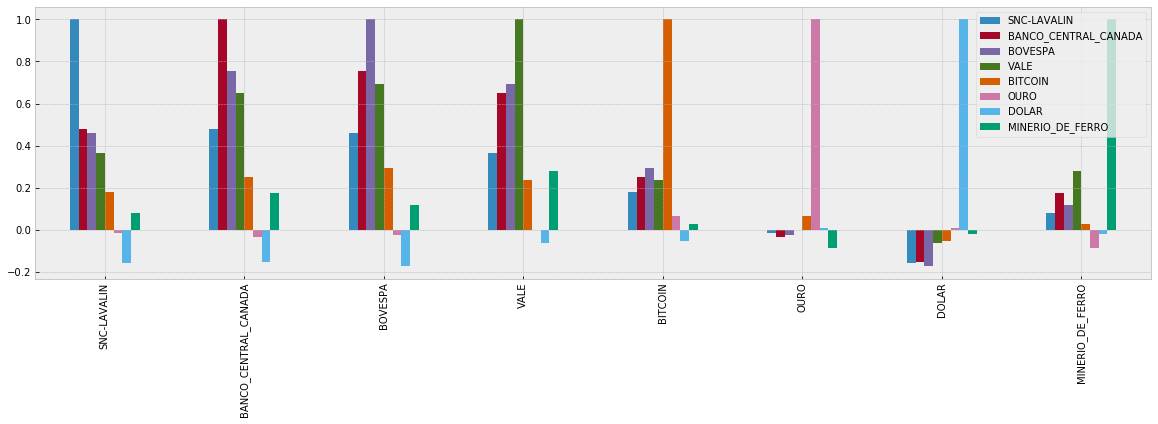

In [12]:
cor_returns.plot(kind='bar', figsize=(20,5))